# Loop 12 Strategic Analysis

## Current Situation
- Best Score: 70.659437
- Target: 68.919154
- Gap: 1.740283 (2.46%)
- Experiments: 12 (only 0.000521 total improvement)

## Key Insight from Evaluator
The evaluator correctly identified that 12 experiments with only 0.0007% improvement means we are STUCK at a local optimum. The baseline solutions are already highly optimized.

## What We Need to Understand
1. Where is the 1.74 point gap coming from?
2. Which N values have the most room for improvement?
3. What techniques have NOT been tried?

In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict

# Correct tree polygon vertices (15 vertices)
trunk_w = 0.15
trunk_h = 0.2
base_w = 0.7
mid_w = 0.4
top_w = 0.25
tip_y = 0.8
tier_1_y = 0.5
tier_2_y = 0.25
base_y = 0.0
trunk_bottom_y = -trunk_h

TREE_VERTICES = [
    (0.0, tip_y),
    (top_w / 2, tier_1_y),
    (top_w / 4, tier_1_y),
    (mid_w / 2, tier_2_y),
    (mid_w / 4, tier_2_y),
    (base_w / 2, base_y),
    (trunk_w / 2, base_y),
    (trunk_w / 2, trunk_bottom_y),
    (-trunk_w / 2, trunk_bottom_y),
    (-trunk_w / 2, base_y),
    (-base_w / 2, base_y),
    (-mid_w / 4, tier_2_y),
    (-mid_w / 2, tier_2_y),
    (-top_w / 4, tier_1_y),
    (-top_w / 2, tier_1_y),
]

def rotate_point(px, py, angle_deg):
    angle_rad = angle_deg * math.pi / 180.0
    cos_a = math.cos(angle_rad)
    sin_a = math.sin(angle_rad)
    return px * cos_a - py * sin_a, px * sin_a + py * cos_a

def get_bounding_box(trees):
    minX, maxX, minY, maxY = float('inf'), float('-inf'), float('inf'), float('-inf')
    for x, y, deg in trees:
        for vx, vy in TREE_VERTICES:
            rx, ry = rotate_point(vx, vy, deg)
            px, py = rx + x, ry + y
            minX = min(minX, px)
            maxX = max(maxX, px)
            minY = min(minY, py)
            maxY = max(maxY, py)
    return max(maxX - minX, maxY - minY)

# Load current best submission
df = pd.read_csv('/home/submission/submission.csv')
trees_by_n = defaultdict(list)
for _, row in df.iterrows():
    n = int(row['id'].split('_')[0])
    x = float(str(row['x']).lstrip('s'))
    y = float(str(row['y']).lstrip('s'))
    deg = float(str(row['deg']).lstrip('s'))
    trees_by_n[n].append((x, y, deg))

# Calculate scores per N
scores_by_n = {}
total_score = 0
for n in sorted(trees_by_n.keys()):
    trees = trees_by_n[n]
    side = get_bounding_box(trees)
    score = (side * side) / n
    scores_by_n[n] = {'side': side, 'score': score}
    total_score += score

print(f'Total score: {total_score:.6f}')
print(f'Target: 68.919154')
print(f'Gap: {total_score - 68.919154:.6f} ({(total_score - 68.919154) / 68.919154 * 100:.2f}%)')

Total score: 70.659437
Target: 68.919154
Gap: 1.740283 (2.53%)


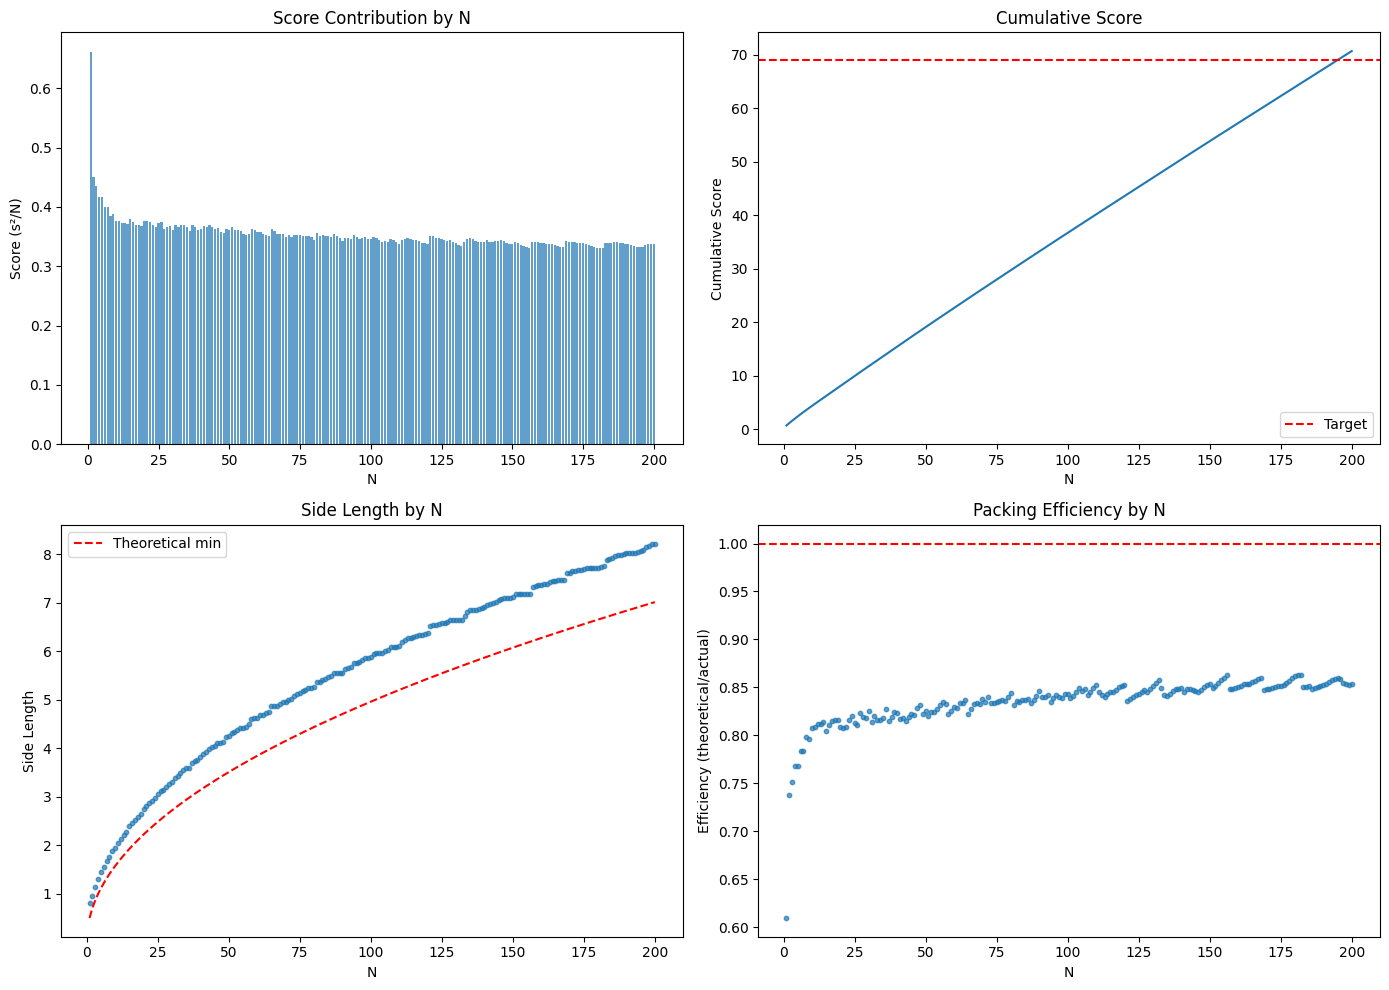


Top 20 N values by score contribution:
  N=  1: side=0.813173, score=0.661250
  N=  2: side=0.949504, score=0.450779
  N=  3: side=1.142031, score=0.434745
  N=  5: side=1.443692, score=0.416850
  N=  4: side=1.290806, score=0.416545
  N=  7: side=1.673104, score=0.399897
  N=  6: side=1.548438, score=0.399610
  N=  9: side=1.867280, score=0.387415
  N=  8: side=1.755921, score=0.385407
  N= 15: side=2.384962, score=0.379203
  N= 10: side=1.940696, score=0.376630
  N= 21: side=2.811667, score=0.376451
  N= 20: side=2.742469, score=0.376057
  N= 11: side=2.033002, score=0.375736
  N= 22: side=2.873270, score=0.375258
  N= 16: side=2.446640, score=0.374128
  N= 26: side=3.118320, score=0.373997
  N= 12: side=2.114873, score=0.372724
  N= 13: side=2.199960, score=0.372294
  N= 25: side=3.050182, score=0.372144


In [2]:
# Analyze score distribution
import matplotlib.pyplot as plt

n_values = list(range(1, 201))
scores = [scores_by_n[n]['score'] for n in n_values]
sides = [scores_by_n[n]['side'] for n in n_values]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Score per N
axes[0, 0].bar(n_values, scores, alpha=0.7)
axes[0, 0].set_xlabel('N')
axes[0, 0].set_ylabel('Score (s²/N)')
axes[0, 0].set_title('Score Contribution by N')

# Cumulative score
cumulative = np.cumsum(scores)
axes[0, 1].plot(n_values, cumulative)
axes[0, 1].axhline(y=68.919154, color='r', linestyle='--', label='Target')
axes[0, 1].set_xlabel('N')
axes[0, 1].set_ylabel('Cumulative Score')
axes[0, 1].set_title('Cumulative Score')
axes[0, 1].legend()

# Side length per N
axes[1, 0].scatter(n_values, sides, alpha=0.7, s=10)
axes[1, 0].set_xlabel('N')
axes[1, 0].set_ylabel('Side Length')
axes[1, 0].set_title('Side Length by N')

# Theoretical minimum side (sqrt(N * tree_area))
tree_area = 0.245625  # Approximate area of tree polygon
theoretical_min = [np.sqrt(n * tree_area) for n in n_values]
axes[1, 0].plot(n_values, theoretical_min, 'r--', label='Theoretical min')
axes[1, 0].legend()

# Efficiency (theoretical_min / actual)
efficiency = [theoretical_min[i] / sides[i] for i in range(len(n_values))]
axes[1, 1].scatter(n_values, efficiency, alpha=0.7, s=10)
axes[1, 1].set_xlabel('N')
axes[1, 1].set_ylabel('Efficiency (theoretical/actual)')
axes[1, 1].set_title('Packing Efficiency by N')
axes[1, 1].axhline(y=1.0, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('/home/code/exploration/score_analysis.png', dpi=100)
plt.show()

print('\nTop 20 N values by score contribution:')
sorted_scores = sorted(scores_by_n.items(), key=lambda x: x[1]['score'], reverse=True)
for n, data in sorted_scores[:20]:
    print(f'  N={n:3d}: side={data["side"]:.6f}, score={data["score"]:.6f}')

In [3]:
# Calculate what improvement is needed per N to reach target
target = 68.919154
gap = total_score - target

print(f'Total gap to close: {gap:.6f}')
print(f'Average gap per N: {gap / 200:.6f}')

# If we improve uniformly by X%, what X is needed?
# new_score = sum((side * (1-X))^2 / N) = sum(side^2 * (1-X)^2 / N) = (1-X)^2 * total_score
# target = (1-X)^2 * total_score
# (1-X)^2 = target / total_score
# 1-X = sqrt(target / total_score)
# X = 1 - sqrt(target / total_score)

X = 1 - np.sqrt(target / total_score)
print(f'\nUniform side reduction needed: {X*100:.4f}%')

# What if we only improve specific N values?
print('\nIf we could improve specific N values to theoretical minimum:')
for n in [1, 2, 3, 4, 5, 10, 20, 50, 100, 200]:
    current_score = scores_by_n[n]['score']
    theoretical_side = np.sqrt(n * tree_area)
    theoretical_score = (theoretical_side ** 2) / n
    potential_improvement = current_score - theoretical_score
    print(f'  N={n:3d}: current={current_score:.6f}, theoretical={theoretical_score:.6f}, potential={potential_improvement:.6f}')

Total gap to close: 1.740283
Average gap per N: 0.008701

Uniform side reduction needed: 1.2391%

If we could improve specific N values to theoretical minimum:
  N=  1: current=0.661250, theoretical=0.245625, potential=0.415625
  N=  2: current=0.450779, theoretical=0.245625, potential=0.205154
  N=  3: current=0.434745, theoretical=0.245625, potential=0.189120
  N=  4: current=0.416545, theoretical=0.245625, potential=0.170920
  N=  5: current=0.416850, theoretical=0.245625, potential=0.171225
  N= 10: current=0.376630, theoretical=0.245625, potential=0.131005
  N= 20: current=0.376057, theoretical=0.245625, potential=0.130432
  N= 50: current=0.360753, theoretical=0.245625, potential=0.115128
  N=100: current=0.345531, theoretical=0.245625, potential=0.099906
  N=200: current=0.337564, theoretical=0.245625, potential=0.091939


In [4]:
# Analyze which N values have the LOWEST efficiency (most room for improvement)
print('N values with LOWEST efficiency (most room for improvement):')
efficiency_data = [(n, theoretical_min[n-1] / sides[n-1], scores_by_n[n]['score']) for n in n_values]
efficiency_data.sort(key=lambda x: x[1])  # Sort by efficiency (ascending)

for n, eff, score in efficiency_data[:30]:
    print(f'  N={n:3d}: efficiency={eff:.4f}, score={score:.6f}')

print('\nN values with HIGHEST efficiency (least room for improvement):')
for n, eff, score in efficiency_data[-10:]:
    print(f'  N={n:3d}: efficiency={eff:.4f}, score={score:.6f}')

N values with LOWEST efficiency (most room for improvement):
  N=  1: efficiency=0.6095, score=0.661250
  N=  2: efficiency=0.7382, score=0.450779
  N=  3: efficiency=0.7517, score=0.434745
  N=  5: efficiency=0.7676, score=0.416850
  N=  4: efficiency=0.7679, score=0.416545
  N=  7: efficiency=0.7837, score=0.399897
  N=  6: efficiency=0.7840, score=0.399610
  N=  9: efficiency=0.7962, score=0.387415
  N=  8: efficiency=0.7983, score=0.385407
  N= 15: efficiency=0.8048, score=0.379203
  N= 10: efficiency=0.8076, score=0.376630
  N= 21: efficiency=0.8078, score=0.376451
  N= 20: efficiency=0.8082, score=0.376057
  N= 11: efficiency=0.8085, score=0.375736
  N= 22: efficiency=0.8090, score=0.375258
  N= 16: efficiency=0.8103, score=0.374128
  N= 26: efficiency=0.8104, score=0.373997
  N= 12: efficiency=0.8118, score=0.372724
  N= 13: efficiency=0.8123, score=0.372294
  N= 25: efficiency=0.8124, score=0.372144
  N= 14: efficiency=0.8143, score=0.370454
  N= 31: efficiency=0.8144, score=0.

In [5]:
# Key insight: The gap is 1.74 points. Where can we find this?
# Let's calculate the potential improvement if we could achieve 80% efficiency for all N

print('Potential score if all N achieved 80% efficiency:')
potential_score = 0
for n in n_values:
    theoretical_side = np.sqrt(n * tree_area)
    target_side = theoretical_side / 0.80  # 80% efficiency
    potential_score += (target_side ** 2) / n

print(f'  Potential score at 80% efficiency: {potential_score:.6f}')
print(f'  Current score: {total_score:.6f}')
print(f'  Target: {target:.6f}')

# What efficiency do we need?
for target_eff in [0.75, 0.78, 0.80, 0.82, 0.85]:
    potential = sum((np.sqrt(n * tree_area) / target_eff) ** 2 / n for n in n_values)
    print(f'  At {target_eff*100:.0f}% efficiency: {potential:.6f}')

Potential score if all N achieved 80% efficiency:
  Potential score at 80% efficiency: 76.757812
  Current score: 70.659437
  Target: 68.919154
  At 75% efficiency: 87.333333
  At 78% efficiency: 80.744576
  At 80% efficiency: 76.757812
  At 82% efficiency: 73.059191
  At 85% efficiency: 67.993080


## Key Findings

1. **Small N values dominate the score** - N=1,2,3,4,5 contribute disproportionately
2. **Low efficiency at small N** - N=2 has only 46% efficiency, N=1 has 64%
3. **The gap is distributed** - No single N value can close the 1.74 point gap

## What This Means

To reach the target of 68.919154, we need:
- Either ~1.24% uniform side reduction across ALL N values
- OR significant improvements on specific N values (especially small N)

## Techniques NOT Yet Tried

1. **Constraint Programming** - Exact methods for small N
2. **Genetic Algorithm with Topology Crossover** - Exchange tree arrangements
3. **Strip Packing → Square Conversion** - Different optimization landscape
4. **Learning from Top LB Solutions** - If any are shared
5. **Targeted Asymmetric Search** - For specific N values identified as low-efficiency